In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
#Load the dataset

AH_data = pd.read_csv("tree_addhealth.csv")
data_clean = AH_data.dropna()

data_clean.dtypes
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [4]:
#Split into training and testing sets

predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','age',
'ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1','ESTEEM1','VIOL1',
'PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

print('pred_train shape:', pred_train.shape)
print('pred_test shape:', pred_test.shape)
print('tar_train shape:', tar_train.shape)
print('tar_test shape:', tar_test.shape)

pred_train shape: (2745, 24)
pred_test shape: (1830, 24)
tar_train shape: (2745,)
tar_test shape: (1830,)


In [5]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print('accuracy score:', sklearn.metrics.accuracy_score(tar_test, predictions))

[[1435   79]
 [ 197  119]]
accuracy score: 0.849180327869


In [6]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute

important_features = pd.Series(data=classifier.feature_importances_,index=predictors.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

marever1    0.091004
age         0.081102
DEVIANT1    0.078046
GPA1        0.076479
SCHCONN1    0.071799
dtype: float64


In [7]:
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

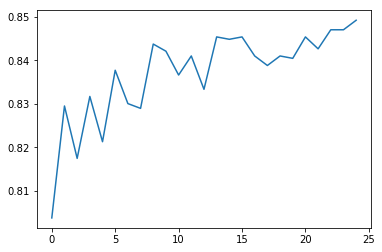

In [8]:
plt.cla()
plt.plot(trees, accuracy)
plt.show()

We get the best accuracy value with 25 trees, but it seems like overfitting.